# Book Recommendation Analysis   

Books have been one source of inspiration and mind building over the years. Thankfully there have been a lot of writers doing justice to make peopl more facinated to reading and also save the reading culture. 

One of the best method to aid in selecting the next book to read is by going through ones book title choice to select the next book. 
One good way is by using [Recommendation Systems](https://en.wikipedia.org/wiki/Recommender_system#:~:text=A%20recommender%20system%2C%20or%20a,would%20give%20to%20an%20item.) these are very common due to continuous demand and need to get the best book to read.  

A recommendation system is a subclass of information filtering system that seeks to predict the "rating" or "preference" a user would give to an item.  
They are primarily used in commercial applications. (source - Wikipedia)

> ### <u>Aim of the Project </u>
>1. This Project Looks to  analyse and preprocess the [Book Recommendation Dataset](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset) from kaggle i have also saved the data i used in my github repository.
>2. Find the Most books read by the user
>3. Average user ratings of books.
>4. Top Author and Publisher with the years with highest books published.

**Whole code below is written [Python](https://www.python.org/) using various libraries.** _and creating functions for some of the code for reuseability._

<p align="center">
    <br clear="right"/>
    <img src="https://i2.wp.com/thenerddaily.com/wp-content/uploads/2019/06/Book-Recommendations-Four-Word-Title.jpg?resize=768%2C570&ssl=1" alt="Books" width="1000" height="500" />
</p>

In [1]:
# Load the various library that would be used in the notebook. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import pickle as pkl
import re 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [21]:
DATA = {'book': 'Books.csv',
              'rating': 'ratings.csv',
              'user': 'Users.csv'}

def filter_value():
    '''
    This function looks into the dictionary and then loads the corresponding  
    data. This function would accept any entry within the dictionary regardless
    of the Case of Way it is written

    '''
    try:
        # Turn the entry to mixture of Capital and Small letters to accomondate different method of user input
        data = input("Enter the required value here. It should be any of book, rating, user").casefold() 
        while data not in DATA:
            print('The information given is not allowed.\n Enter a new one')
            # Turn the entry to first letter Capital and the rest small letters
            data = input("Enter the required value here. It should be any of book, rating, user").casefold()
        print('You entered:', data)

    except Exception as e:
        print('There is an error in your input: {}'.format(e))
    print('-'*20)
    # make the final data entry as lower regardless of the input  
    data = data.lower()
    return data
    
# Declare a variable to access the function created
data = filter_value()   

You entered: rating
--------------------


In [22]:
def load_data(data):
    '''
    This function would Load Data into dataframe which
    would be needed for analysis. It check if a condition is met
    then load the dataframe else load the other condition until
    the condition is met.

    '''
    if data == 'book':
    # load the book data if book is passed into the function 
        df = pd.read_csv(DATA[data])       
    elif data == 'rating':
    # Load the rating data if rating is passed into the function
        df = pd.read_csv(DATA[data])        
    else:
    # load the user data if none of the rating or book data is passed into the function
        df = pd.read_csv(DATA[data])       
    
    return(df)

details = load_data(data)                 # Variable to load the function 

In [23]:
# Uncomment the variable representing the data loaded into the function e.g if book is loaded uncomment book
#book = details            # Save if function return book dataframe
#user = details            # Save if function return user dataframe 
#rating = details          # Save if function return rating dataframe

In [7]:
# Check the output of the function saved as a variable
book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


## Data Cleaning 

In [8]:
def check_data_details(details):

    '''
    This function performs some descriptive analysis of the data to get some 
    information about the data and hence do some data cleaning
    or data wrangling as needed.

    '''
    # Check the information of the loaded data
    details_info = details.info()               

    # Check if there is null value present in the dataframe
    details_no_null = details.isnull().sum()

    # Check the measures of center tendency of the data loaded
    details_desc = details.describe()

    print(f'{details_info}\n',
     f'No of null {details_no_null}\n',
     f'description {details_desc}........')
    

From the Above function, it is shown that the *`Book-Author`, `Publisher`, `Image-URL-L`* have some null values from the book DataFrame loaded.

Therefore, There is need to investigate the data more closely and do some data cleaning where need be.

In [9]:
check_data_details(book)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None
 No of null ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
 description               ISBN      Book-Title      Book-Author  Year-Of-Publication  \
count       271360          27

In [58]:
def Book_Ticks():
    '''
    This function finds the unique value of each columns of the dataframe
    of the data passed to check if there is any column with not well 
    presented values.

    '''
    
    try:

    # Ask user to input desired column to check.
        publication = input('Enter the value of column to consider: ')
        while publication not in book.columns:
            print('Value can only be a column in the dataframe')
            publication = input('Enter the value of column to consider: ')
        print('This column asked to consider is', publication)
    
    except Exception as e:
        print('There is an error with the input: {}'.format(e))
    print('='*40)
    return print(f'\n The column is of data type: {book[publication].dtype}\n',
    '='*100, f'\n With the value of {publication}; {book[publication].unique()}')
Check_column = Book_Ticks()


This column asked to consider is Year-Of-Publication

 The column is of data type: object
 With the value of Year-Of-Publication; [2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947 1945
 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927 1931
 1914 2050 1934 1910 1933 1902 1924 1921 1900 2038 2026 1944 1917 1901
 2010 1908 1906 1935 1806 2021 '2000' '1995' '1999' '2004' '2003' '1990'
 '1994' '1986' '1989' '2002' '1981' '1993' '1983' '1982' '1976' '1991'
 '1977' '1998' '1992' '1996' '0' '1997' '2001' '1974' '1968' '1987' '1984'
 '1988' '1963' '1956' '1970' '1985' '1978' '1973' '1980' '1979' '1975'
 '1969' '1961' '1965' '1939' '1958' '1950' '1953' '1966' '1971' '1959'
 '1972' '1

From  the data,  It is seen that the Year of Publication year is not well represented having checked the unique values of each column in the book dataframe. 

This would need some cleaning which i wrote another function to treat the cleanin of the rows affected below.

In [10]:
Publication = input('Enter the desired text here: ')

def Check_Book_Columns(Publication):
    '''
    This function does the same thing as the Book_Tick Function.
    You can use any of the function suitable for you. It would still 
    return the same output.
    '''
    
    try:
        Investigate = book[Publication]

    # Check the data type of the column passed
        c = Investigate.dtype 

    # Check the unique values present in the column passed.    
        d = Investigate.unique()   
        
    except Exception as e:
        print('There is an error with the input: {}'.format(e))
    print('='*40)
    print(f'The data is of type: {c}\n', 
        '-'*120,
        f'\n with unique values: {d}\n', '='*100, f'\n And the value of {Publication} are: {c}')
    return (Investigate) 


In [11]:
Check_column = Check_Book_Columns(Publication)

The data is of type: object
 ------------------------------------------------------------------------------------------------------------------------ 
 with unique values: [2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947 1945
 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927 1931
 1914 2050 1934 1910 1933 1902 1924 1921 1900 2038 2026 1944 1917 1901
 2010 1908 1906 1935 1806 2021 '2000' '1995' '1999' '2004' '2003' '1990'
 '1994' '1986' '1989' '2002' '1981' '1993' '1983' '1982' '1976' '1991'
 '1977' '1998' '1992' '1996' '0' '1997' '2001' '1974' '1968' '1987' '1984'
 '1988' '1963' '1956' '1970' '1985' '1978' '1973' '1980' '1979' '1975'
 '1969' '1961' '1965' '1939' '1958' '19

In [12]:
def Identify_Anom(df):
    '''
    This function accepts the loaded book dataframe, then Locate the position of values 
    not well represented.
    Also split the 2nd column of the set of new dataframe given by the delimiter ; and give 
    the values.
    Clean the values of the columns present in the new dataframe then present it in a more 
    presentable and clean form.

    '''
    # Locate the position of the rows with the different values in the column Year of Publication
    Search = df.loc[(Check_column == 'DK Publishing Inc') | (Check_column == 'Gallimard')]

    # On the second column, split the values by the delimiter ; in one appearance.
    Split_info = Search.iloc[:,1].str.split(pat=";", n= 1)

    # Load the value in a dataframe 
    df_Split_info = pd.DataFrame(Split_info)

    # Load the list value to a dataframe 
    Sep_df_Split_info = pd.DataFrame(df_Split_info['Book-Title'].to_list())

    # Rename the column name to more appropriate column title and also index 
    Rename_Col_Sep_df_Split_info = Sep_df_Split_info.rename(columns={0 : 'Book-Title', 1 : 'Book-Author'},index={0:209538, 1:220731, 2:221678})

    # Move the values in the dataframe by one column to the right 
    Data_shift = Search.shift(periods=1, axis='columns') 

    # Shift the data of the specified column only by one to the left 
    Clean = Data_shift[['ISBN', 'Book-Title','Book-Author']].shift(-1, axis= 'columns') 

    # Store the result of the modification as a new value of the dataframe
    Data_shift[['ISBN', 'Book-Title']] = Clean[['ISBN', 'Book-Title']]
    Data_shift[['Book-Title', 'Book-Author']] = Rename_Col_Sep_df_Split_info[['Book-Title', 'Book-Author']]
    
    return(Data_shift)

#Look for the position of the index given and store it as the value of the function result
book.loc[[209538,220731,221678],:] = Identify_Anom(book)

# #Create a variable to save the new cleaned dataframe 
cleaned_details = book

In [13]:
cleaned_details.loc[[209538,220731,221678],:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...","Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\""","Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...","James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...


It is seen that the columns are not well represented with their values i created a function to clean the data and present the values properly

In [15]:
def Columns_needed(df,a,b):

    '''
    This function divides the dataframe to columns needed. 
    So as to make analysis simple and be more focused.
    The function accepts a dataframe and two positive integers
    
    '''

    c = df.iloc[:,a:b]   
    d = df.iloc[:,[a,1,2,5,b,b+1]]

    # Check of the condition is met, then return the value of c. 
    if a == 0 and b <= 5:
        print('This is the Needed cleaned data')
        print('='*70)
        return c
    
    # If the first condition is not met, then run this conditional.
    elif a == 0 and b >= 6:
        print('This is the other part of the cleaned data')
        print('='*70)
        return d 
    # If non of the condition is met, then print the statement given in return below
    else:
        return 'Value must be a dataframe, and positive integers'
        
        
# # Save the function output in a variable
Columns = Columns_needed(cleaned_details,0,5)

This is the Needed cleaned data


In [16]:
def Publication_Change(Columns):
    '''
    This function change the Year of publication data type to numeric then,
    convert any year more than 2021 or less than 0 which is the maximun and 
    minimum years considering to nan value then fill nan value by the mean 
    of the column in view. Then present column as an integer data type.
    Also this function fill all nan in other columns of object type by the 
    word 'Unknown'.
    
    '''

    # Convert the YearOfPublication from Object data types to numeric datatypes
    Columns['Year-Of-Publication'] = pd.to_numeric(Columns['Year-Of-Publication'], errors='coerce') 
    
    # In the column Year of Publish, it shows that there is 0 as year and also years more than the present year (2022)
    Columns.loc[(Columns['Year-Of-Publication'] > 2021) | (Columns['Year-Of-Publication'] <= 0),'Year-Of-Publication'] = np.nan

    # Fill all nan value as mean of the Year of Publication 
    Columns['Year-Of-Publication'].fillna(round(Columns['Year-Of-Publication'].mean()),inplace= True)

    Columns = Columns.astype({'Year-Of-Publication':np.int64})

    #Check if there are null value in the Dataframe
    Columns.isnull().sum() 
    Columns['Publisher'].fillna('Unknown', inplace= True)
    Columns['Book-Author'].fillna('Unknown', inplace=True)

    return Columns 
    
Total_Cleaned_Data = Publication_Change(Columns)

In [17]:
Total_Cleaned_Data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


#### Check for User Data for any need for changes

> The user data is loaded from the entry input of the filter_value function which should be loaded by inputting user to determine values of the user datasets. 

> All ages less than 4 years or greater than 90 is not considered in the analysis as it is assumed that people within this age bracket can't read or don't have business in active reading. Though this assumption is arguable.

In [25]:
def Clean_User(dfu):

    '''
    This function looks for user ages less than 4 years and greater than 90 years
    from the user dataframe and represent any roles where the ages are less than 
    4 or greater than 90 years with null then fill every null values by the mean of 
    the ages then convert the column back to integer.

    '''
    # Locate rows where the ages is less than 4 years or greater than 90 years
    dfu.loc[(dfu.Age < 4) | (dfu.Age > 90), 'Age'] = np.nan

    # Replace every nan value by the mean of the values of age
    dfu.Age.fillna(dfu.Age.mean(), inplace= True)

    # Convert the age & and User-ID column of the user table to integer
    Details_info = dfu.astype({'Age' : np.int64, 'User-ID' : np.int64})

    return Details_info
    
User_Clean = Clean_User(user)
    

In [26]:
User_Clean

,User-ID,Location,Age
0,1,"nyc, new york, usa",34
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",34
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",34
...,...,...,...
278853,278854,"portland, oregon, usa",34
278854,278855,"tacoma, washington, united kingdom",50
278855,278856,"brampton, ontario, canada",34
278856,278857,"knoxville, tennessee, usa",34


### Checking for what to change in Rating Table

In [27]:
def CheckRatingUser(book,rating):

    '''
    This function check if there is same ISBN present 
    in the book table and the user table

    '''
    # Are there rows with same ISBN book number in the user table as well as the book table
    #...Check = book[book.user_id.isin(User_Clean['User-ID'])]...

    Check_2 = rating[rating.user_id.isin(User_Clean['User-ID'])]
    
    return Check_2


In [28]:
CleanRating = CheckRatingUser(book,rating)

In [29]:
CleanRating.rating.unique()

array([5, 3, 4, 1, 2], dtype=int64)

In [30]:
def highest_rating():
    '''
    Plot the Most rating given by users
    '''

    plt.figure(figsize=(9, 5))
    plt.title('Rating Counts')
    new = sns.countplot(x = 'rating', data = rating)
    return new

The chart shows that more 4 rating were given which shows that the ratings are good for the review given the readers. Hence the books are good

<AxesSubplot:title={'center':'Rating Counts'}, xlabel='rating', ylabel='count'>

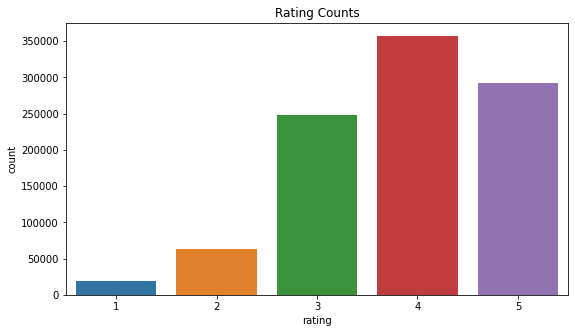

In [31]:
highest_rating()

In [32]:
# Cleaning Titles to get from Meta data

def Cleans_title(text):

    '''
    This function removes all unwanted such as meta characters
    of the column book-title of the cleaned book data table

    '''
    # Perform a regex where any value not starting with an Alphabet or Numeric data type is removed from the title
    text = re.sub(r'[^a-zA-Z0-9]',' ',text) 
       
    return text

It is noticed that the Book Titiles are not not properly formatted hence there is need to remove all meta characters and not needed characters from the title name 

In [33]:
#Applying the function to the Book title Column
Total_Cleaned_Data['Book-Title'] = Total_Cleaned_Data['Book-Title'].apply(lambda x:Cleans_title(x)) 

In [34]:
Total_Cleaned_Data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [35]:
def User_Rating_Merge():
    '''
    This function merge the cleaned user table and the cleaned rating table
    since the rating has no need of doing any cleaning on the table we just 
    load it that way.
    '''
    # Merge tables and join on the column user id which is the common column in both table
    Merger = User_Clean.merge(rating, left_on= 'User-ID', right_on= 'user_id')
    
    return Merger

In [36]:
# # Create a variable to save the output of the function 
User_Rating_Merge =  User_Rating_Merge()

In [37]:
#Check if there are any nan value in the merged data table 
User_Rating_Merge.isna().sum()

User-ID     0
Location    0
Age         0
book_id     0
user_id     0
rating      0
dtype: int64

In [38]:
def addBookID():
    '''
    Since i want to join the 3 tables together to form one single table,
    I have to make sure that the tables have common column values.
    the user_rating column does nor have one or more common column with the 
    book table hence this function creates an a new column and named as the 
    book_id
    '''
    # Create a new index starting from 1 
    Total_Cleaned_Data.index = np.arange(1,len(Total_Cleaned_Data)+1)

    #Reset the index to make the former index as a column
    Total_Cleaned_Data.reset_index(inplace=True)

    #Rename the title of the new column as Book_id 
    Total_Cleaned_Data.rename(columns={'index':'Book_id'},inplace=True)
    
    return Total_Cleaned_Data

Total_CleanedBook_DataID = addBookID()

In [39]:
Total_CleanedBook_DataID.head()

,Book_id,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,1,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,3,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,4,0374157065,Flu The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,5,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [40]:
def Book_User_Rating():
    '''
    This function merge the cleaned book table and the user_rating table
    joining both tables on the book_id columns.
    Then return the required column needed in the final table.
    '''
    # Merge the cleaned book table with the user_rating merged table 
    Final_Book_Table = Total_CleanedBook_DataID.merge(User_Rating_Merge,left_on='Book_id', right_on='book_id')

    # Give only the columns specified in the iloc and discard the rest
    FinalCleaned_Book_Table = Final_Book_Table.iloc[:,[0,1,2,3,4,5,6,8,7,11]]

    return FinalCleaned_Book_Table
    
Final_Table  = Book_User_Rating()

In [41]:
# Determine if there is any null value present in the final table 
Final_Table.isna().sum()

Book_id                0
ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
User-ID                0
Age                    0
Location               0
rating                 0
dtype: int64

In [42]:
Final_Table.head(5)

,Book_id,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Age,Location,rating
0,1,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,314,28,"århus, n/a, denmark",5
1,1,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,439,34,"tiburon, california, usa",3
2,1,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,588,60,"roseville, minnesota, usa",5
3,1,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,1169,27,"olympia, washington, usa",4
4,1,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,1185,34,"tiburon, california, usa",4


In [43]:
# This is to know the number of times each book title appears in the records which is the most read book
def most_read_books(Final_Table):
    ''' 
    This function finds the top 5 most read books 
    '''

    most_read = Final_Table['Book-Title'].value_counts().reset_index() 
    most_read.columns = ['Book-Title', 'count']

    return most_read
    
most_read = most_read_books(Final_Table)

In [44]:
most_read.head()

,Book-Title,count
0,The Golden Compass His Dark Materials Book 1,487
1,Bridget Jones s Diary,400
2,The Amber Spyglass His Dark Materials Book 3,400
3,Ender s Game Ender Wiggins Saga Paperback,398
4,Animal Farm,397


In [45]:
def plot_most_read():
    '''
    The function shows the barchart of the most books read
    '''

    plt.figure(figsize=(10,10))
    plt.title('Top 20 read books')
    ax = sns.barplot(y='Book-Title', x='count', data = most_read.head(20), palette='bone')

    # This is to put the labels in the bar chart
    for i in ax.containers:
        label = ax.bar_label(i,label_type='center', color = 'w')
    return ax

<AxesSubplot:title={'center':'Top 20 read books'}, xlabel='count', ylabel='Book-Title'>

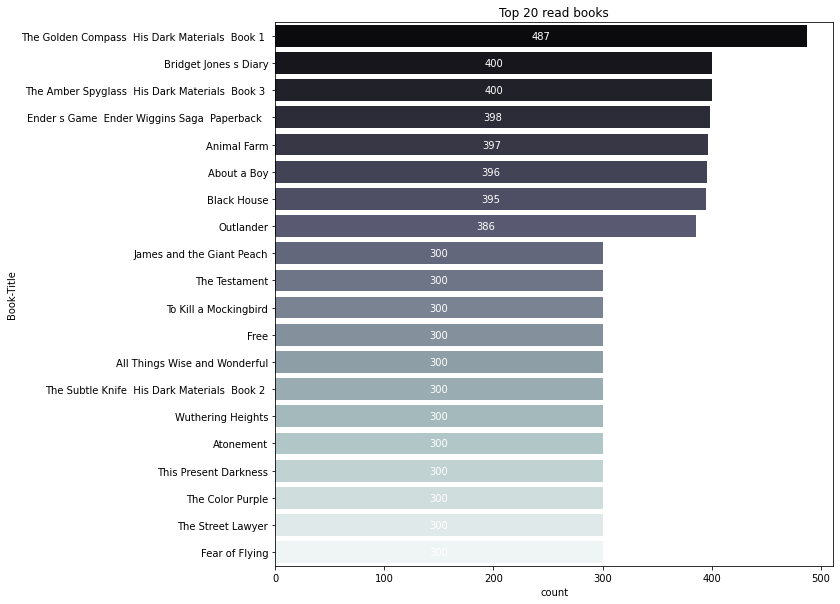

In [46]:
plot_most_read()

In [47]:
Final_Table.iloc[220838]

Book_id                                     2210
ISBN                                  0618050140
Book-Title                             The Ledge
Book-Author                      Michael Collier
Year-Of-Publication                         2000
Publisher               Houghton Mifflin Company
User-ID                                    30479
Age                                           34
Location               edmonton, alberta, canada
rating                                         5
Name: 220838, dtype: object

In [49]:
def Avg_Ratings():
    '''
    Find the top average rated books read and drop any ducplicate value available

    '''
    Avg_Ratings = Final_Table[['Book-Title','rating']]

    #Group the table by group title and find the mean of the rating
    Avg_Ratings = Avg_Ratings.groupby('Book-Title',as_index=False)['rating'].mean()

    # Sort the result in descending order and drop any duplicate value 
    Avg_Ratings = Avg_Ratings.sort_values('rating',ascending=False).drop_duplicates(subset=['Book-Title'],keep='first')

    Avg_Ratings = Avg_Ratings[['Book-Title', 'rating']]
    #Avg_Ratings = Avg_Ratings['rating'].map(lambda x : round(x))
    #Avg_Ratings = round(Avg_Ratings)
    return Avg_Ratings

Avg_Ratings = Avg_Ratings()

In [50]:
Avg_Ratings.tail()  #Lowest Average Rating books

,Book-Title,rating
1747,Death Row,2.462687
8428,The Trials of Tiffany Trott,2.457447
2726,French Lieutenant s Woman,2.430000
1211,Cause of Death,2.350515
2419,Extra Terrestrials Among Us Llewellyn s Psi T...,2.312500


In [51]:
## I want to know the most read books and their average

def most_rated_book(Avg_R, most_R):

    '''
    This find the averae rating of the 20 most read books

    '''

    #Avg_Ratings  #Average Rating
    #most_read     # Total number of books read

    most_Rated_book = Avg_R.merge(most_R, on='Book-Title') # Create a new table which is called most_Rated_book
    most_Rated_book = most_Rated_book.sort_values('count', ascending=False)
    most_Rated_book = most_Rated_book.head(20)
    most_Rated_book = most_Rated_book.sort_values('rating', ascending=False)

    fig = plt.figure(figsize=(10,10))
    titles = plt.title('Average Ratings of the most read books')
    bx = sns.barplot(y = 'Book-Title', x ='rating', data = most_Rated_book, palette = 'autumn');

    for i in bx.containers:
        bx.bar_label(i,)

    return bx

<AxesSubplot:title={'center':'Average Ratings of the most read books'}, xlabel='rating', ylabel='Book-Title'>

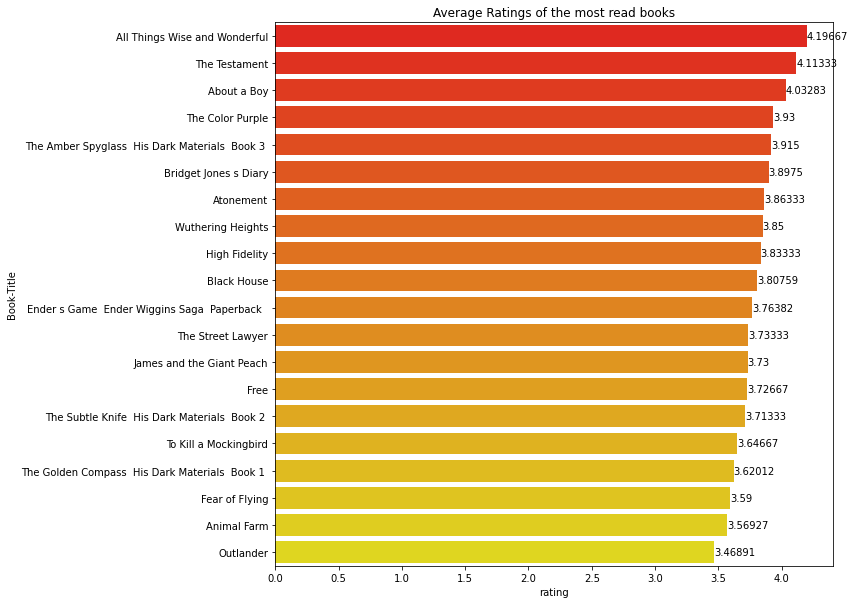

In [52]:
most_rated_book(Avg_Ratings,most_read)

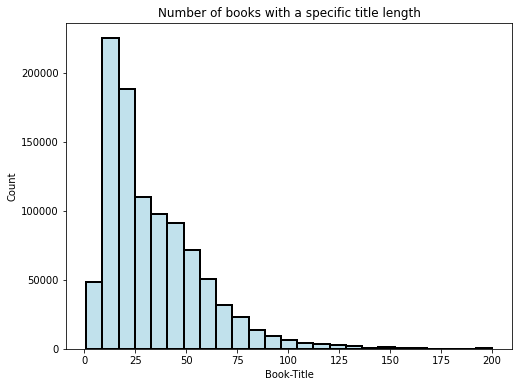

In [53]:
def length_title():
    title_length = Final_Table['Book-Title'].map(lambda x: len(x))

    plt.figure(figsize=(8,6))
    plt.title('Number of books with a specific title length')
    fx = sns.histplot(title_length, bins=25, color = 'lightblue', linewidth = 2, edgecolor = 'black');
    return fx

Title_length = length_title()

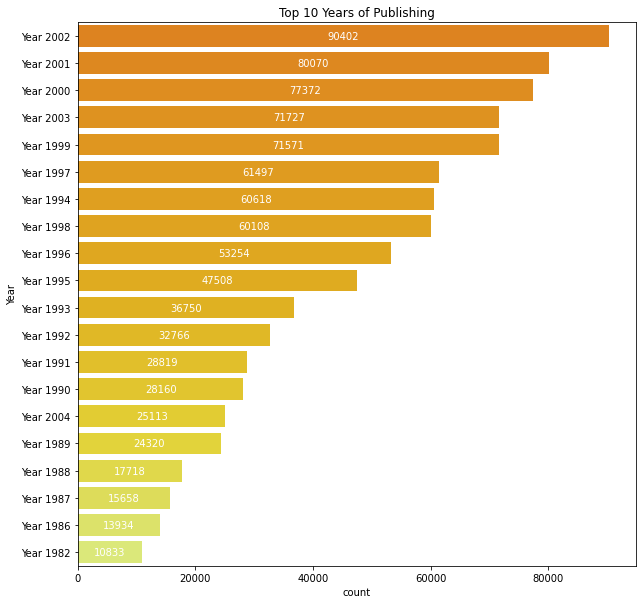

In [54]:
# Years with the Highest Publish

def Year_Published():
    YearofPublish = Final_Table['Year-Of-Publication'].value_counts().reset_index()
    YearofPublish.columns = ['Year','count']
    YearofPublish.Year = 'Year ' + YearofPublish['Year'].astype(str) 

    YearofPublish = YearofPublish.sort_values('count', ascending=False)

    plt.figure(figsize=(10,10))
    plt.title('Top 10 Years of Publishing')
    cx = sns.barplot(x='count', y='Year', data = YearofPublish.head(20), palette='Wistia_r')

    for i in cx.containers:
        cx.bar_label(i, label_type='center', color = 'w')
    return cx

Published_Year = Year_Published()

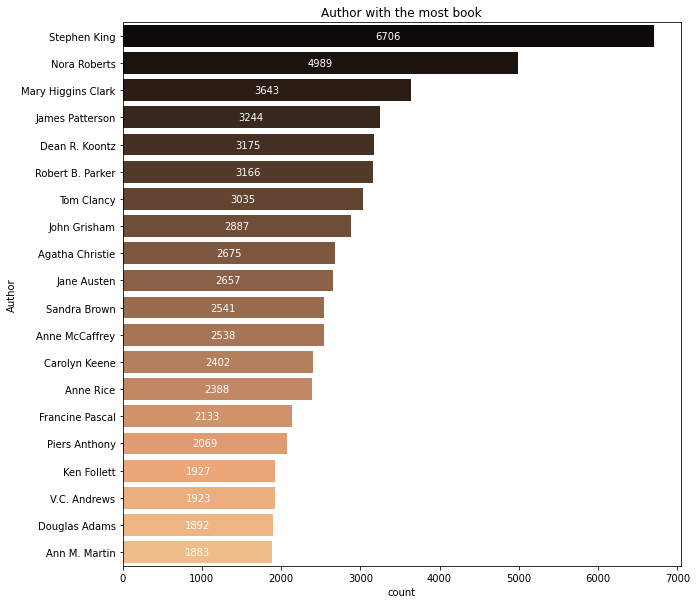

In [55]:
def Top_Author():
  '''
  This gives the top 20 Authors with the highest book published
  '''

 
  BookAuthor = Final_Table['Book-Author'].value_counts().reset_index()
  BookAuthor.columns = ['Author','count']
  BookAuthor['Author'] = BookAuthor['Author']

  BookAuthor = BookAuthor.sort_values('count', ascending=False)


  plt.figure(figsize=(10,10))
  plt.title('Author with the most book')
  dx = sns.barplot(x='count', y='Author', data = BookAuthor.head(20), palette='copper')

  for i in dx.containers:
    dx.bar_label(i, label_type='center', color = 'w')
  return dx
Top20_Authors = Top_Author()

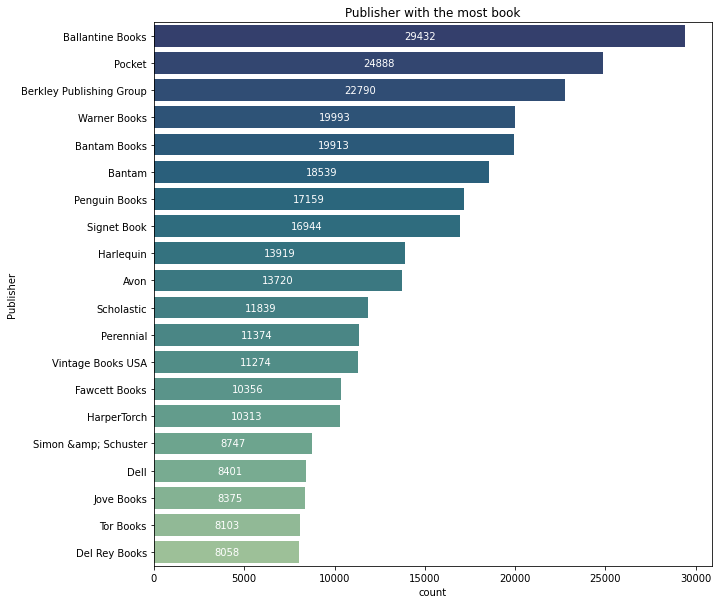

In [56]:
def Highest_Publisher():
  '''
  This function gives the publisher with the most book available

  '''
  BookPublisher = Final_Table['Publisher'].value_counts().reset_index()
  BookPublisher.columns = ['Publisher','count']

  BookPublisher = BookPublisher.sort_values('count', ascending=False)


  plt.figure(figsize=(10,10))
  plt.title('Publisher with the most book')
  ex = sns.barplot(x='count', y='Publisher', data = BookPublisher.head(20), palette='crest_r')

  for i in ex.containers:
    ex.bar_label(i, label_type='center', color = 'w')
  return ex

Publisher_highest = Highest_Publisher()

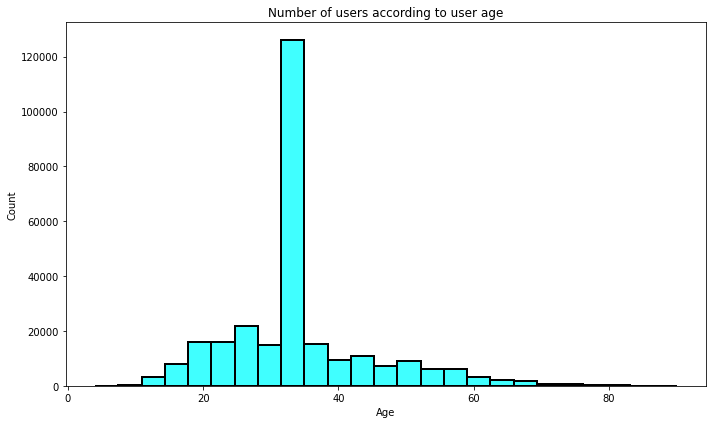

In [57]:
user_age = User_Clean.Age
plt.figure(figsize=(10,6), tight_layout=True)
plt.title('Number of users according to user age')
sns.histplot(user_age, bins=25, linewidth = 2, color = 'cyan', edgecolor = 'black');